In [1]:
import scanpy as sc
import squidpy as sq
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from squidpy.pl._utils import save_fig
from time import process_time

sc.logging.print_header()
sc.set_figure_params(facecolor="white", figsize=(8, 8))
sc.settings.verbosity = 1
sc.settings.dpi = 300
sq.__version__
sc.settings.figdir = "./figures"

%load_ext autoreload
%autoreload 2
%load_ext lab_black

scanpy==1.8.0.dev78+gc488909a anndata==0.7.5 umap==0.4.6 numpy==1.20.1 scipy==1.6.0 pandas==1.2.3 scikit-learn==0.24.2 statsmodels==0.12.2 python-igraph==0.8.3 leidenalg==0.8.3


In [2]:
adata_visium = sq.datasets.visium_fluo_adata()
adata_slideseq = sq.datasets.slideseqv2()
adata_seqfish = sq.datasets.seqfish()
adata_fouri = sq.datasets.four_i()
adata_imc = sq.datasets.imc()
adata_merfish = sq.datasets.merfish()
adata_mibitof = sq.datasets.mibitof()

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [3]:
adata_mibitof = adata_mibitof[adata_mibitof.obs.batch == "0"].copy()
adata_merfish = adata_merfish[adata_merfish.obs.batch == "0"].copy()

adata_seqfish.obs["cluster"] = adata_seqfish.obs.celltype_mapped_refined
adata_imc.obs["cluster"] = adata_imc.obs["cell type"]
adata_slideseq.obs["cluster"] = adata_slideseq.obs["cluster"]
adata_merfish.obs["cluster"] = adata_merfish.obs["Cell_class"]
adata_mibitof.obs["cluster"] = adata_mibitof.obs["Cluster"]

/Users/giovanni.palla/miniconda3/envs/spatial/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


In [4]:
dic_list = []
for i in np.arange(5):
    for adata, data_id in zip(
        [
            adata_visium,
            adata_seqfish,
            adata_fouri,
            adata_imc,
            adata_merfish,
            adata_mibitof,
            adata_slideseq,
        ],
        ["visium", "seqfish", "4i", "imc", "merfish", "mibitof", "slideseq"],
    ):
        cluster_id = "cluster"
        start_t = process_time()
        sq.gr.spatial_neighbors(adata, coord_type="generic")
        duration_graph = process_time() - start_t

        start_t = process_time()
        sq.gr.nhood_enrichment(adata, cluster_key=cluster_id)
        duration_nhood = process_time() - start_t

        dic_list.append(
            {
                "dataset": data_id,
                "time_nhood": duration_nhood,
                "time_graph": duration_graph,
                "n_obs": adata.shape[0],
                "n_cluster": adata.obs[cluster_id].cat.categories.shape[0],
                "idx": i,
            }
        )

  0%|          | 0/1000 [00:00<?, ?/s]

  0%|          | 0/1000 [00:00<?, ?/s]

  0%|          | 0/1000 [00:00<?, ?/s]

  0%|          | 0/1000 [00:00<?, ?/s]

  0%|          | 0/1000 [00:00<?, ?/s]

/Users/giovanni.palla/Projects/squidpy/squidpy/gr/_nhood.py:180: RuntimeWarning: invalid value encountered in true_divide
  zscore = (count - perms.mean(axis=0)) / perms.std(axis=0)


  0%|          | 0/1000 [00:00<?, ?/s]

  0%|          | 0/1000 [00:00<?, ?/s]

  0%|          | 0/1000 [00:00<?, ?/s]

  0%|          | 0/1000 [00:00<?, ?/s]

  0%|          | 0/1000 [00:00<?, ?/s]

  0%|          | 0/1000 [00:00<?, ?/s]

  0%|          | 0/1000 [00:00<?, ?/s]

/Users/giovanni.palla/Projects/squidpy/squidpy/gr/_nhood.py:180: RuntimeWarning: invalid value encountered in true_divide
  zscore = (count - perms.mean(axis=0)) / perms.std(axis=0)


  0%|          | 0/1000 [00:00<?, ?/s]

  0%|          | 0/1000 [00:00<?, ?/s]

  0%|          | 0/1000 [00:00<?, ?/s]

  0%|          | 0/1000 [00:00<?, ?/s]

  0%|          | 0/1000 [00:00<?, ?/s]

  0%|          | 0/1000 [00:00<?, ?/s]

  0%|          | 0/1000 [00:00<?, ?/s]

  0%|          | 0/1000 [00:00<?, ?/s]

  0%|          | 0/1000 [00:00<?, ?/s]

  0%|          | 0/1000 [00:00<?, ?/s]

  0%|          | 0/1000 [00:00<?, ?/s]

  0%|          | 0/1000 [00:00<?, ?/s]

  0%|          | 0/1000 [00:00<?, ?/s]

  0%|          | 0/1000 [00:00<?, ?/s]

  0%|          | 0/1000 [00:00<?, ?/s]

  0%|          | 0/1000 [00:00<?, ?/s]

  0%|          | 0/1000 [00:00<?, ?/s]

  0%|          | 0/1000 [00:00<?, ?/s]

  0%|          | 0/1000 [00:00<?, ?/s]

  0%|          | 0/1000 [00:00<?, ?/s]

  0%|          | 0/1000 [00:00<?, ?/s]

/Users/giovanni.palla/Projects/squidpy/squidpy/gr/_nhood.py:180: RuntimeWarning: invalid value encountered in true_divide
  zscore = (count - perms.mean(axis=0)) / perms.std(axis=0)


  0%|          | 0/1000 [00:00<?, ?/s]

  0%|          | 0/1000 [00:00<?, ?/s]

In [5]:
df = pd.DataFrame(dic_list)
df = df.groupby(["dataset", "n_obs"]).mean()
df.reset_index(drop=False, inplace=True)
df = df[["dataset", "time_nhood", "time_graph", "n_obs"]].copy()
df.rename(
    columns={"time_nhood": "nhood_enrichment", "time_graph": "graph"}, inplace=True
)
df = df.melt(
    id_vars="dataset",
    value_vars=["nhood_enrichment", "graph"],
    value_name="mean",
    var_name="method",
)
df["tool"] = "squidpy"
df

obs_df = pd.DataFrame(dic_list)
obs_df = obs_df[["n_obs", "n_cluster", "dataset"]].copy()
obs_df.drop_duplicates(inplace=True)
obs_df.reset_index(inplace=True, drop=True)

In [12]:
giotto = pd.read_csv("./benchmark_giotto_results.csv", index_col=0)
giotto.rename(columns={"expr": "method"}, inplace=True)
giotto = giotto[["method", "mean", "dataset"]].copy()
giotto = giotto[giotto.method != "net_delaunay"].copy()
giotto.replace({"net_knn": "graph", "cellproxy": "nhood_enrichment"}, inplace=True)
giotto["tool"] = "giotto"
giotto

,method,mean,dataset,tool
2,graph,0.267416,imc,giotto
3,nhood_enrichment,11.966149,imc,giotto
5,graph,0.151062,visium,giotto
6,nhood_enrichment,7.036482,visium,giotto
8,graph,0.060989,mibitof,giotto
9,nhood_enrichment,2.634384,mibitof,giotto
11,graph,1.035087,seqfish,giotto
12,nhood_enrichment,59.267392,seqfish,giotto
14,graph,17.974755,4i,giotto
15,nhood_enrichment,3651.567270,4i,giotto


In [13]:
giotto.dataset.replace("slideseqv2", "slideseq", inplace=True)
giotto

,method,mean,dataset,tool
2,graph,0.267416,imc,giotto
3,nhood_enrichment,11.966149,imc,giotto
5,graph,0.151062,visium,giotto
6,nhood_enrichment,7.036482,visium,giotto
8,graph,0.060989,mibitof,giotto
9,nhood_enrichment,2.634384,mibitof,giotto
11,graph,1.035087,seqfish,giotto
12,nhood_enrichment,59.267392,seqfish,giotto
14,graph,17.974755,4i,giotto
15,nhood_enrichment,3651.567270,4i,giotto


In [14]:
final_df = pd.concat([df, giotto], axis=0)
final_df = final_df.merge(obs_df, on="dataset")
final_df["log_mean"] = np.log10(1 + final_df["mean"].values)
final_df["log_n_obs"] = np.log10(1 + final_df["n_obs"].values)
final_df

,dataset,method,mean,tool,n_obs,n_cluster,log_mean,log_n_obs
0,4i,nhood_enrichment,19.545221,squidpy,270876,10,1.312711,5.432772
1,4i,graph,1.149582,squidpy,270876,10,0.332354,5.432772
2,4i,graph,17.974755,giotto,270876,10,1.278176,5.432772
3,4i,nhood_enrichment,3651.567270,giotto,270876,10,3.562598,5.432772
4,imc,nhood_enrichment,0.622245,squidpy,4668,11,0.210116,3.669224
5,imc,graph,0.015560,squidpy,4668,11,0.006706,3.669224
6,imc,graph,0.267416,giotto,4668,11,0.102919,3.669224
7,imc,nhood_enrichment,11.966149,giotto,4668,11,1.112811,3.669224
8,merfish,nhood_enrichment,0.844826,squidpy,6509,16,0.265955,3.813581
9,merfish,graph,0.016850,squidpy,6509,16,0.007257,3.813581


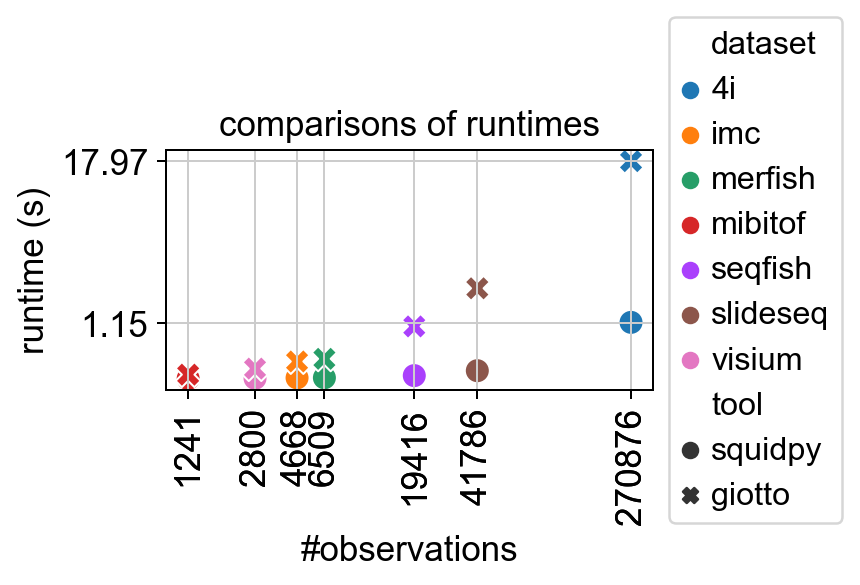

In [15]:
fig, ax = plt.subplots(tight_layout=True, dpi=180, figsize=(5, 3))
data = final_df[final_df.method == "graph"]
sns.scatterplot(
    data=data, x="log_n_obs", y="log_mean", hue="dataset", style="tool", s=100, ax=ax
)
plt.xticks(data.log_n_obs.values, data.n_obs.values, rotation=90)
plt.yticks(
    np.round(data.log_mean.values[[0, 1]], 2),
    np.round(data["mean"].values[[0, 1]], 2),
)
ax.set_ylabel("runtime (s)")
ax.set_xlabel("#observations")
ax.legend(loc="center left", bbox_to_anchor=(1, 0.5))
_ = ax.set_title("comparisons of runtimes")

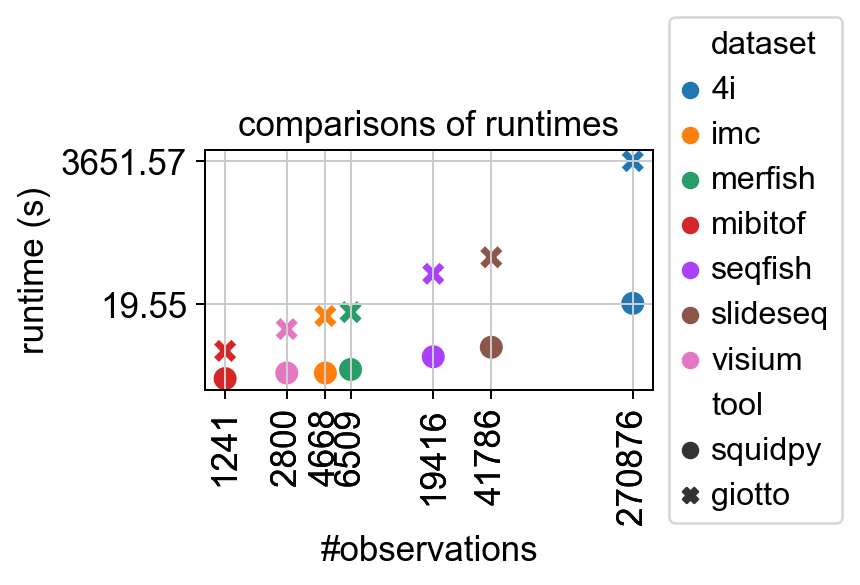

In [16]:
fig, ax = plt.subplots(tight_layout=True, dpi=180, figsize=(5, 3))
data = final_df[final_df.method == "nhood_enrichment"]
sns.scatterplot(
    data=data, x="log_n_obs", y="log_mean", hue="dataset", style="tool", s=100, ax=ax
)
plt.xticks(data.log_n_obs.values, data.n_obs.values, rotation=90)
plt.yticks(
    np.round(data.log_mean.values[[0, 1]], 2),
    np.round(data["mean"].values[[0, 1]], 2),
)
ax.set_ylabel("runtime (s)")
ax.set_xlabel("#observations")
ax.legend(loc="center left", bbox_to_anchor=(1, 0.5))
_ = ax.set_title("comparisons of runtimes")

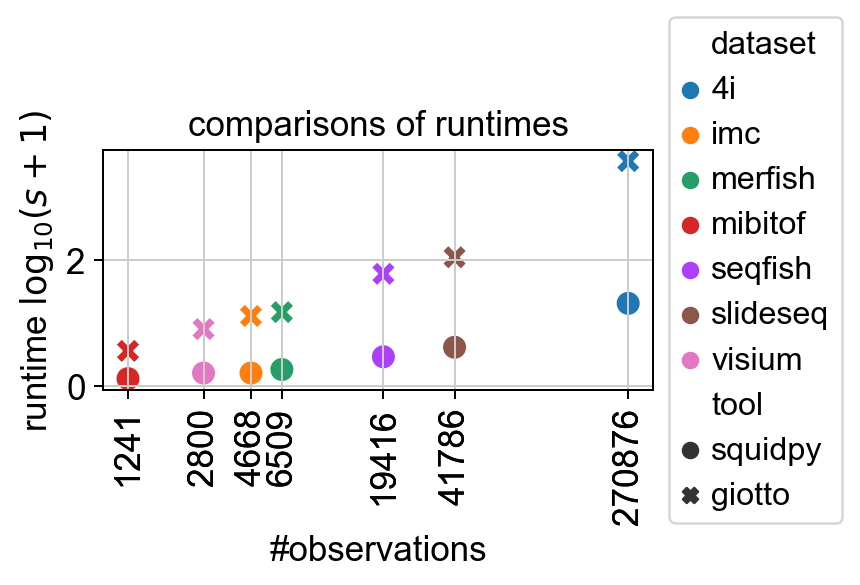

In [17]:
fig, ax = plt.subplots(tight_layout=True, dpi=180, figsize=(5, 3))
data = final_df[final_df.method == "nhood_enrichment"]
sns.scatterplot(
    data=data, x="log_n_obs", y="log_mean", hue="dataset", s=100, style="tool", ax=ax
)
plt.xticks(data.log_n_obs.values, data.n_obs.values, rotation=90)
ax.set_ylabel(r"runtime $\log_{10}(s+1)$")
ax.set_xlabel("#observations")
ax.legend(loc="center left", bbox_to_anchor=(1, 0.5))
_ = ax.set_title("comparisons of runtimes")